DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_10380\854749533.py:39: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


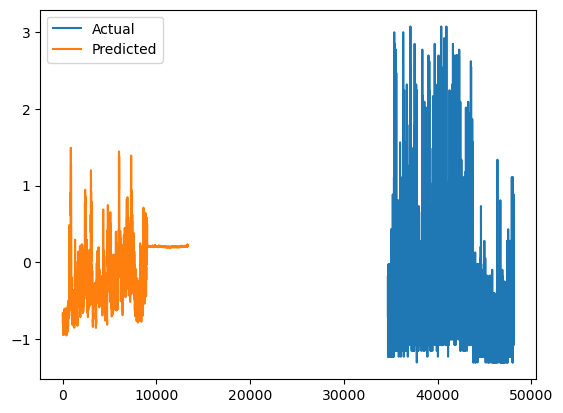

In [1]:
#USING (SVR) SUPPORT VECTOR REGRESSION MODEL

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt



# USING FUNCTION TO HANDLE_OUTLIERS

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# DATAAET
df = pd.read_csv(r"C:\Users\nh013\Desktop\trafic control.csv\traffic.csv")

# FEATURE SELCECTION

df = df[['DateTime','Junction','Vehicles','ID']]

# IDENDIFY MISSING VALUES

print(df.isnull().sum())

# DROP ROWS WITH MISSING VALUES

df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)


# ONE -HOT  ENCODING
df = pd.get_dummies(df, columns=['Junction'])

#HANDLE OUTLIERS
df = handle_outliers(df, 'Vehicles')

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)


scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])


scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# ROLLING STATISTICS
df['Average_rolling_mean'] = df['Vehicles'].rolling(window=30).mean()
df['Average_rolling_std'] = df['Vehicles'].rolling(window=30).std()

# DROP NAN VALUES
df.dropna(inplace=True)

# SPLIT DATA
X = df.drop(['DateTime', 'ID', 'Vehicles'], axis=1)
y = df['Vehicles']


train_size = int(0.7 * len(df))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# SVR MODEL
model = SVR()

# FIT THE MODEL
model.fit(X_train, y_train)

# PREDICT 
y_pred = model.predict(X_test)


plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()